In [1]:
pip install gseapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gseapy

In [7]:
# assign a list object to enrichr
gl = ["BCL6", "IL1B", "NLRP3", "METRNL", "PTGS2", "TNF", "TNFRSF1B"]


enrich_reseult = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023', outdir='test')


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [4]:
?gseapy

Type:        module
String form: <module 'gseapy' from '/opt/conda/lib/python3.10/site-packages/gseapy/__init__.py'>
File:        /opt/conda/lib/python3.10/site-packages/gseapy/__init__.py
Docstring:   <no docstring>

In [12]:
enrich_reseult.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Inflammatory Response (GO:0050727),7/240,3.282288e-14,1.483594e-11,0,0,138320.000000,4.294511e+06,BCL6;IL1B;NLRP3;METRNL;PTGS2;TNFRSF1B;TNF
1,GO_Biological_Process_2023,Regulation Of Neuroinflammatory Response (GO:0...,4/19,2.031261e-11,4.590649e-09,0,0,1775.822222,4.372035e+04,IL1B;PTGS2;TNFRSF1B;TNF
2,GO_Biological_Process_2023,Positive Regulation Of Membrane Protein Ectodo...,3/14,9.539120e-09,1.077921e-06,0,0,1362.409091,2.516079e+04,IL1B;TNFRSF1B;TNF
3,GO_Biological_Process_2023,Positive Regulation Of Acute Inflammatory Resp...,3/14,9.539120e-09,1.077921e-06,0,0,1362.409091,2.516079e+04,IL1B;PTGS2;TNF
4,GO_Biological_Process_2023,Regulation Of Membrane Protein Ectodomain Prot...,3/21,3.481864e-08,3.147605e-06,0,0,832.291667,1.429304e+04,IL1B;TNFRSF1B;TNF
5,GO_Biological_Process_2023,Cellular Response To Lipopolysaccharide (GO:00...,4/124,4.855369e-08,3.657712e-06,0,0,220.811111,3.718591e+03,IL1B;NLRP3;TNFRSF1B;TNF
6,GO_Biological_Process_2023,Positive Regulation Of Nitric Oxide Biosynthet...,3/27,7.650685e-08,4.840635e-06,0,0,624.031250,1.022530e+04,IL1B;PTGS2;TNF
7,GO_Biological_Process_2023,Positive Regulation Of Nitric Oxide Metabolic ...,3/28,8.567495e-08,4.840635e-06,0,0,599.040000,9.748001e+03,IL1B;PTGS2;TNF
8,GO_Biological_Process_2023,Regulation Of Nitric Oxide Biosynthetic Proces...,3/39,2.386151e-07,1.198378e-05,0,0,415.770833,6.339846e+03,IL1B;PTGS2;TNF
9,GO_Biological_Process_2023,Positive Regulation Of NIK/NF-kappaB Signaling...,3/53,6.103652e-07,2.758850e-05,0,0,299.145000,4.280528e+03,IL1B;NLRP3;TNF


In [14]:
from gseapy import barplot, dotplot

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


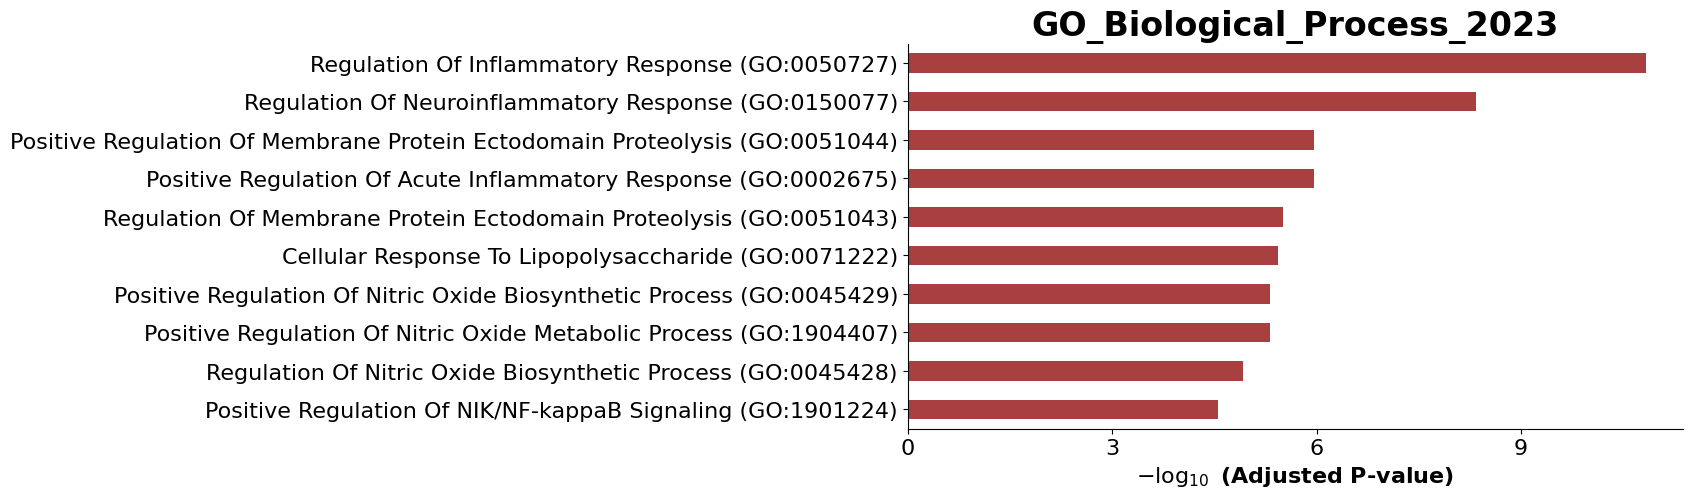

In [17]:
ax = barplot(enrich_reseult.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred')

# Core Cd14 mono

In [19]:
# assign a list object to enrichr
gl = ['TRIM8', 'TP53INP1', 'ZSWIM8', 'FURIN', 'TRIM38', 'FOXO1']


enrich_result = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023', outdir='test')


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [20]:
enrich_result.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of Cellular Catabolic Proc...,6/146,1.364240e-13,1.814440e-11,0,0,119124.000000,3.528811e+06,TRIM8;TP53INP1;ZSWIM8;FURIN;TRIM38;FOXO1
1,GO_Biological_Process_2023,Positive Regulation Of Autophagy (GO:0010508),4/107,1.151750e-08,7.659135e-07,0,0,386.233010,7.060107e+03,TRIM8;TP53INP1;TRIM38;FOXO1
2,GO_Biological_Process_2023,Regulation Of Autophagy (GO:0010506),4/241,3.026803e-07,1.341883e-05,0,0,166.725738,2.502651e+03,TRIM8;TP53INP1;TRIM38;FOXO1
3,GO_Biological_Process_2023,Positive Regulation By Symbiont Of Entry Into ...,2/12,4.943298e-06,1.314917e-04,0,0,999.200000,1.220770e+04,FURIN;TRIM38
4,GO_Biological_Process_2023,Positive Regulation Of Viral Entry Into Host C...,2/12,4.943298e-06,1.314917e-04,0,0,999.200000,1.220770e+04,FURIN;TRIM38
5,GO_Biological_Process_2023,Positive Regulation Of Viral Life Cycle (GO:19...,2/22,1.727872e-05,3.830115e-04,0,0,499.350000,5.475890e+03,FURIN;TRIM38
6,GO_Biological_Process_2023,Regulation Of Viral Entry Into Host Cell (GO:0...,2/44,7.055399e-05,1.340526e-03,0,0,237.523810,2.270522e+03,FURIN;TRIM38
7,GO_Biological_Process_2023,Positive Regulation Of Protein Catabolic Proce...,2/92,3.102068e-04,5.157188e-03,0,0,110.577778,8.932773e+02,FURIN;FOXO1
8,GO_Biological_Process_2023,Regulation Of Protein Catabolic Process (GO:00...,2/122,5.447884e-04,8.050761e-03,0,0,82.808333,6.223140e+02,FURIN;FOXO1
9,GO_Biological_Process_2023,Positive Regulation Of NF-kappaB Transcription...,2/152,8.436496e-04,1.122054e-02,0,0,66.146667,4.681711e+02,TRIM8;TRIM38


In [21]:
from gseapy import barplot, dotplot

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


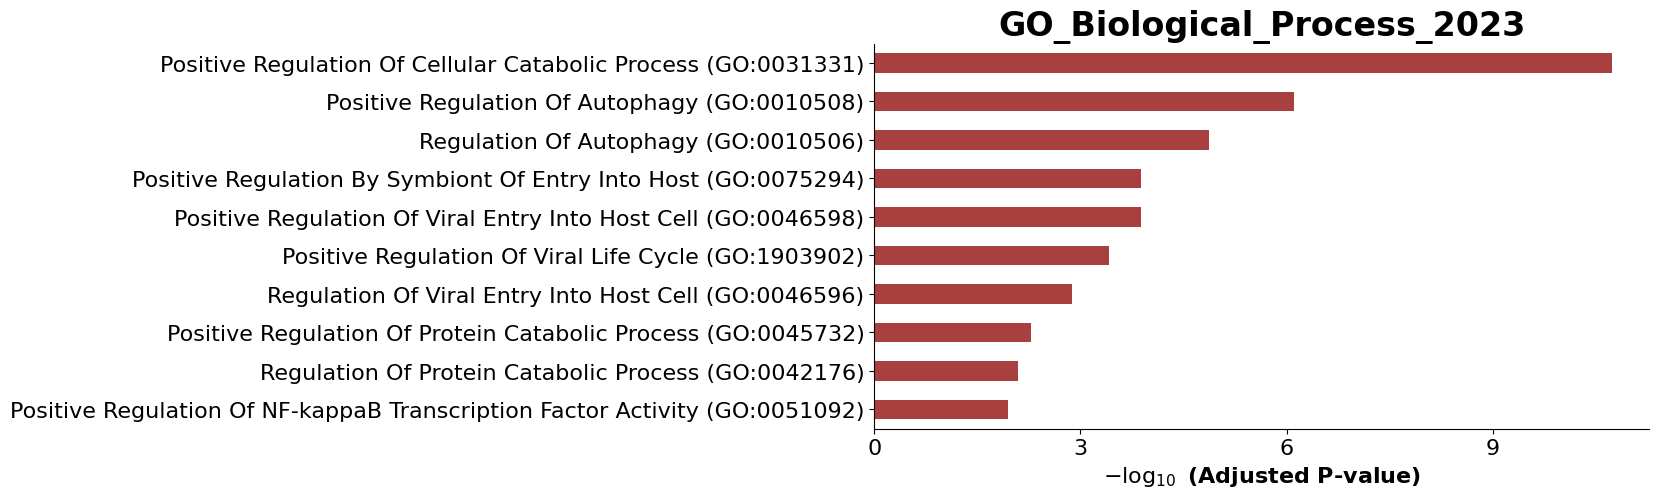

In [22]:
ax = barplot(enrich_result.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred')